In [2]:
import pandas as pd
import diviner.plot_utils as pu
import diviner.file_utils as fu
import diviner.calib as c

In [3]:
pd.__version__

'0.24.1'

In [4]:
pump = fu.Div247DataPump("20110416")

In [9]:
df = pump.get_n_hours_from_t(4, 0)

2011041600.div247
2011041601.div247
2011041602.div247
2011041603.div247


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112496 entries, 2011-04-16 00:00:01.296999 to 2011-04-16 04:00:00.887000
Columns: 252 entries, sclk to is_calib
dtypes: bool(6), float64(241), int32(4), int64(1)
memory usage: 210.9 MB


In [12]:
calib = c.Calibrator(df)

INFO:diviner.calib:Calibrating from 2011-04-16 00:00:01.296999 to 2011-04-16 04:00:00.887000.


In [13]:
offsets = calib.get_offsets()

AttributeError: 'Calibrator' object has no attribute 'get_offsets'

In [20]:
from diviner.calib import get_calib_blocks, CalBlock

In [18]:
calblocks = get_calib_blocks(df, 'calib')

In [29]:
cb = CalBlock(calblocks[1])

In [39]:
cb.offsets.a4_11

2011-04-16 00:02:30.738499    23231.75
Name: a4_11, dtype: float64

In [43]:
bucket = []
for k,v in calblocks.items():
     bucket.append(CalBlock(v).offsets)

In [45]:
offsets = pd.concat(bucket)

In [46]:
offsets.a4_11

2011-04-16 00:02:30.738499000    23231.750000
2011-04-16 00:13:22.011499500    23239.322917
2011-04-16 00:23:03.650499000    23252.750000
2011-04-16 00:33:20.106500000    23282.492188
2011-04-16 00:43:36.562499000    23307.390625
2011-04-16 00:53:53.018499500    23321.507812
2011-04-16 01:04:09.486500000    23314.593750
2011-04-16 01:13:24.503499000    23292.992188
2011-04-16 01:24:42.403000000    23267.750000
2011-04-16 01:34:58.861500000    23246.218750
2011-04-16 01:50:22.525000000    23227.101562
2011-04-16 02:00:38.970499500    23231.875000
2011-04-16 02:10:20.612500000    23243.156250
2011-04-16 02:21:11.888000000    23266.359375
2011-04-16 02:31:28.346499500    23297.304688
2011-04-16 02:41:44.805499500    23314.570312
2011-04-16 02:52:01.264000000    23319.789062
2011-04-16 03:02:17.724500000    23302.929688
2011-04-16 03:10:12.868499000    23284.942708
2011-04-16 03:22:50.641499500    23255.070312
2011-04-16 03:33:07.099999500    23237.226562
2011-04-16 03:38:16.353499500    2

show how the offsets for detectors [1,11,21] vary for all channels

Resampled to 10 s.


TypeError: Empty 'DataFrame': no numeric data to plot

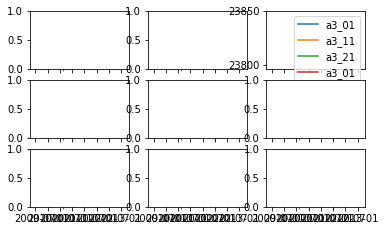

In [48]:
pu.plot_all_channels(offsets, [1,11,21], sharex=True)
# display(gcf())

show how 3 detectors vary in Ch 9

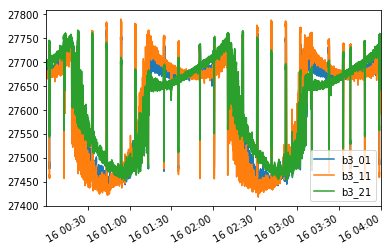

In [50]:
df[['b3_01','b3_11','b3_21']].plot()

In [51]:
grouped = df.groupby(df.calib_block_labels)

In [53]:
def ptp(df):
    return df.max()-df.min()

In [54]:
grouped.b3_21.agg(ptp)

calib_block_labels
0     313.0
1     203.0
2     204.0
3     202.0
4     226.0
5     256.0
6     242.0
7     204.0
8     203.0
9     201.0
10    199.0
11    200.0
12    202.0
13    203.0
14    201.0
15    244.0
16    251.0
17    223.0
18    202.0
19    203.0
20    203.0
21    201.0
22    200.0
23    201.0
24    203.0
Name: b3_21, dtype: float64

show calib_block 4 that contains a solar target view, for det's 1,11,21 of Ch 9

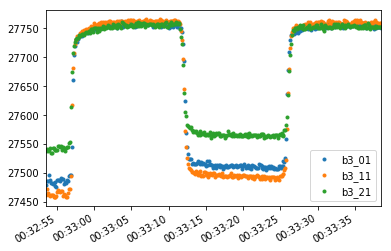

In [56]:
df[df.calib_block_labels==4][['b3_01','b3_11','b3_21']].plot(style='.')

show how all calibration data for detectors 9_1, 9_11 and 9_21 develop in this dataframe

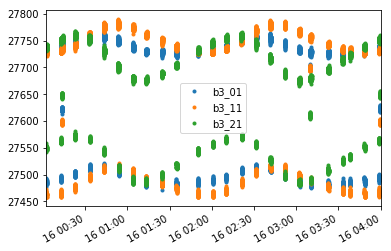

In [57]:
df[df.is_calib][['b3_01','b3_11','b3_21']].plot(style='.')

show how the offset values are positioned correctly over each calibration block.

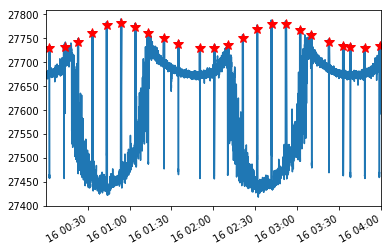

In [59]:
_, ax = plt.subplots()
df.b3_11.plot(ax=ax)
offsets.b3_11.plot(ax=ax,style='r*',markersize=10)

In [60]:
alltimes_offsets = c.get_offsets_at_all_times(df, calib.offsets)

AttributeError: module 'diviner.calib' has no attribute 'get_offsets_at_all_times'

In [36]:
alltimes_offsets

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112496 entries, 2011-04-16 00:02:29.714499 to 2011-04-16 03:59:21.014500
Columns: 189 entries, a1_01 to b3_21
dtypes: float64(189)

In [37]:
df['a3_11_offset'] = alltimes_offsets.a3_11.values

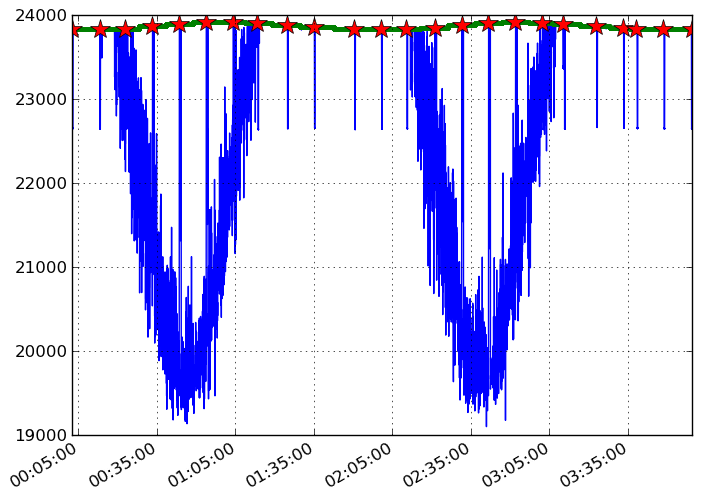

In [39]:
clf()
df.a3_11.plot()
df.a3_11_offset.plot(style='g.')
offsets.a3_11.plot(style='r*',markersize=15)
display(gcf())

In [79]:
from scipy.interpolate import UnivariateSpline as Spline

In [80]:
all_times = df.index

In [81]:
ind = offsets.index.values.astype('float64')

In [82]:
ind

array([  1.31872322e+18,   1.31872384e+18,   1.31872445e+18,
         1.31872504e+18,   1.31872569e+18,   1.31872630e+18,
         1.31872692e+18,   1.31872754e+18,   1.31872823e+18,
         1.31872877e+18,   1.31872938e+18,   1.31873032e+18,
         1.31873093e+18,   1.31873160e+18,   1.31873217e+18,
         1.31873278e+18,   1.31873340e+18,   1.31873402e+18,
         1.31873480e+18,   1.31873525e+18,   1.31873586e+18,
         1.31873648e+18,   1.31873680e+18,   1.31873741e+18])

In [83]:
s=Spline(ind, offsets.a3_11, s = 0.0,k=1)

In [84]:
newtemps = s(all_times.values.astype('float64'))

In [85]:
a3_11_offset = pd.Series(newtemps, index = all_times)

In [86]:
df.a3_11.plot()
offsets.a3_11.plot(style='r*',markersize=15)
a3_11_offset.plot(style='g.')

In [87]:
a3_11_data = df[df.sdtype==0].a3_11

In [88]:
a3_11_data.plot(style='.')

In [89]:
(a3_11_data - a3_11_offset).plot()

In [90]:
df.filter(regex='[ab][0-9]_[0-2][0-9]')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112496 entries, 2011-10-16 00:00:00.601000 to 2011-10-16 04:00:00.190000
Columns: 190 entries, a1_01 to a3_11_offset
dtypes: float64(190)

In [92]:
data = c.get_data_columns(df)

In [93]:
offset = c.get_data_columns(offsets)

In [98]:
data = data.drop('a3_11_offset',axis=1)

In [99]:
offset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2011-10-16 00:00:19.992999 to 2011-10-16 03:56:54.906499
Columns: 189 entries, a1_01 to b3_21
dtypes: float64(189)

In [100]:
data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112496 entries, 2011-10-16 00:00:00.601000 to 2011-10-16 04:00:00.190000
Columns: 189 entries, a1_01 to b3_21
dtypes: float64(189)

In [101]:
x = offset.index.values.astype('float64')

(24, 189)

In [103]:
s = Spline(x, offset.values)

error: failed in converting 2nd argument `y' of dfitpack.fpcurf0 to C/Fortran array

In [105]:
data.apply(lambda x: x.name)

a1_01    a1_01
a1_02    a1_02
a1_03    a1_03
a1_04    a1_04
a1_05    a1_05
a1_06    a1_06
a1_07    a1_07
a1_08    a1_08
a1_09    a1_09
a1_10    a1_10
a1_11    a1_11
a1_12    a1_12
a1_13    a1_13
a1_14    a1_14
a1_15    a1_15
...
b3_07    b3_07
b3_08    b3_08
b3_09    b3_09
b3_10    b3_10
b3_11    b3_11
b3_12    b3_12
b3_13    b3_13
b3_14    b3_14
b3_15    b3_15
b3_16    b3_16
b3_17    b3_17
b3_18    b3_18
b3_19    b3_19
b3_20    b3_20
b3_21    b3_21
Length: 189, Dtype: object